In [1]:
from hashlib import sha256

## Merkle Tree

In [30]:
def hash(value): return sha256(bytes(value, 'utf-8')).hexdigest()
def stringfy(hash): return f'0x{hash[:12]}...{hash[-4:]}'

In [31]:
txs = ['21 eth from 0x1234 to 0x7897',
       '3 eth from 0x7897 to 0x7897',
       '0.5 eth from 0x8999 to 0x1234',
       '7 eth from 0x8999 to 0x7897',
       '99 eth from 0x1234 to 0x7897',
       '2 eth from 0x7897 to 0x7897',
       '0.2 eth from 0x8999 to 0x1234',
       '7 eth from 0x8111 to 0x7897']

leafs = [hash(tx) for tx in txs]

In [32]:
merkle_tree = {}
merkle_tree['0'] = leafs

In [33]:
parents = []
height = 1

while len(leafs) > 1: # check if at root node
    for i in range(0, len(leafs), 2):
        l = leafs[i]
        r = leafs[i+1]
        parent = hash(l+r)
        parents.append(parent)
    leafs = parents
    merkle_tree[f'{height}'] = parents
    parents = []
    height += 1

In [34]:
for i in range(len(merkle_tree)):
    print(f'height {i}')
    for h in merkle_tree[str(i)]: print(stringfy(h))
    print()

height 0
0x8e4fe3ce47fa...0295
0xf741e45404ad...132e
0xbf62810719b8...518c
0x386b37a06cbd...1862
0x6274ce4dcb09...992b
0x4e3aac6c883c...1c1e
0xd206b5ae149f...5f2f
0x5079d459ca93...50d8

height 1
0x46357592dfaa...721a
0x4804599c78f0...d225
0xf98fbbefcc0e...00d2
0xb7e3e2402a51...40d3

height 2
0x863ee009654a...a98a
0x44c5137e3eae...fdab

height 3
0xbe7fdccea4dc...6450



In [7]:
assert merkle_tree['1'][0] == hash(hash(txs[0])+hash(txs[1]))

In [8]:
root_node = merkle_tree[str(height-1)][0]; root_node

'be7fdccea4dc9e0d572348d5ed4c30c0769411e88089a5cc7c2199fb80406450'

## Visualize Merkle Tree

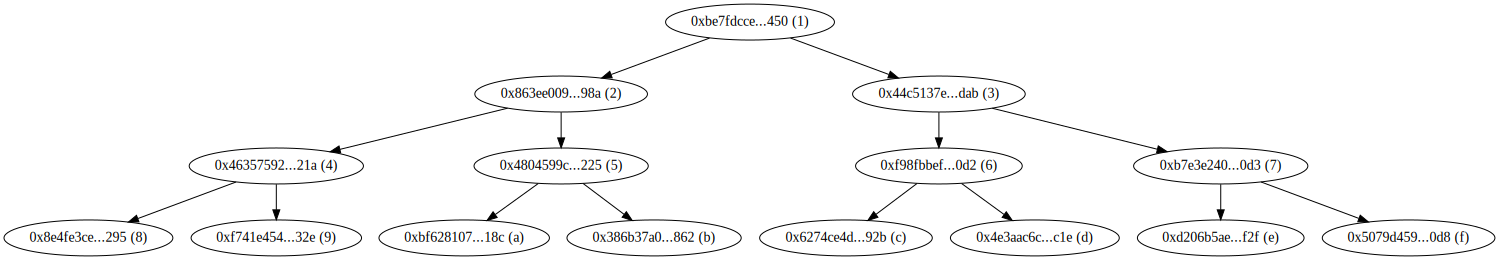

In [9]:
from graphviz import Digraph
dot = Digraph()
dot.node('1', stringfy(root_node)+' (1)')
dot.node('2', stringfy(merkle_tree['2'][0])+' (2)')
dot.node('3', stringfy(merkle_tree['2'][1])+' (3)')
dot.node('4', stringfy(merkle_tree['1'][0])+' (4)')
dot.node('5', stringfy(merkle_tree['1'][1])+' (5)')
dot.node('6', stringfy(merkle_tree['1'][2])+' (6)')
dot.node('7', stringfy(merkle_tree['1'][3])+' (7)')
dot.node('8', stringfy(merkle_tree['0'][0])+' (8)')
dot.node('9', stringfy(merkle_tree['0'][1])+' (9)')
dot.node('a', stringfy(merkle_tree['0'][2])+' (a)')
dot.node('b', stringfy(merkle_tree['0'][3])+' (b)')
dot.node('c', stringfy(merkle_tree['0'][4])+' (c)')
dot.node('d', stringfy(merkle_tree['0'][5])+' (d)')
dot.node('e', stringfy(merkle_tree['0'][6])+' (e)')
dot.node('f', stringfy(merkle_tree['0'][7])+' (f)')


dot.edges(['12', '13', '24', '25', '36', '37', '48', '49', '5a', '5b', '6c', '6d', '7e', '7f'])
dot

## Merkle Proof

Check if `txs[2]` is in the merkle tree. For this the following hashes are required:
- merkle_tree[0][3]
- merkle_tree[1][1]
- merkle_tree[2][0]
- merkle_tree[3][0]

This is very efficient: Tree with height n (with 2^n nodes), only n nodes are needed for a proof.

In [10]:
# O(n^2)
def nodes_in_mt(h): return sum([2**i for i in range(h)])

for h in range(0, 50, 5): print(h, '\t', nodes_in_mt(h))

0 	 0
5 	 31
10 	 1023
15 	 32767
20 	 1048575
25 	 33554431
30 	 1073741823
35 	 34359738367
40 	 1099511627775
45 	 35184372088831


In [11]:
tx = txs[2]; tx

'0.5 eth from 0x8999 to 0x1234'

In [12]:
stringfy(hash(tx))

'0xbf628107...18c'

In [13]:
hash(hash(merkle_tree['1'][0] + hash(hash(tx) + merkle_tree['0'][3])) + merkle_tree['2'][1]) == root_node

True